In [4]:
from __future__ import division
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline
from utils import load_ds1, load_ds2, load_ds2_rand
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, median_absolute_error

from sklearn.externals import joblib
from functools import partial
from utils import *

In [5]:
def load_data():
    features_and_targets = partial(
        FT_ma_ewma_abs_logreturns_vs_abs_logreturn, 
        ma_windows=[],
        ewma_halflifes=[12],
        lret_lookbacks = np.arange(40)+1 
        )
    return load_stock_datasets(features_and_targets)

In [6]:
data = load_data()

In [7]:
print sorted(data.keys())

['AAPL', 'ABT', 'AIG', 'AMGN', 'APA', 'APC', 'AXP', 'BA', 'BAC', 'BAX', 'BIIB', 'BMY', 'C', 'CAT', 'CELG', 'CL', 'CMCSA', 'COP', 'COST', 'CSCO', 'CVS', 'CVX', 'DD', 'DE', 'DELL', 'DHR', 'DIS', 'DOW', 'EMC', 'EMR', 'EOG', 'EXC', 'F', 'GE', 'GILD', 'HAL', 'HD', 'HON', 'HPQ', 'IBM', 'INTC', 'JNJ', 'JPM', 'KO', 'LLY', 'LOW', 'MCD', 'MDT', 'MMM', 'MO', 'MRK', 'MS', 'MSFT', 'NKE', 'ORCL', 'OXY', 'PEP', 'PFE', 'PG', 'PNC', 'PX', 'QCOM', 'SBUX', 'SLB', 'SO', 'SP500', 'SPG', 'T', 'TGT', 'TJX', 'TWX', 'TXN', 'UNH', 'UNP', 'USB', 'UTX', 'VZ', 'WFC', 'WMT', 'XOM']


In [9]:
data[data.keys()[0]].X_train.columns

Index([u'vol', u'ewma-12', u'lret-1', u'lret-2', u'lret-3', u'lret-4',
       u'lret-5', u'lret-6', u'lret-7', u'lret-8', u'lret-9', u'lret-10',
       u'lret-11', u'lret-12', u'lret-13', u'lret-14', u'lret-15', u'lret-16',
       u'lret-17', u'lret-18', u'lret-19', u'lret-20', u'lret-21', u'lret-22',
       u'lret-23', u'lret-24', u'lret-25', u'lret-26', u'lret-27', u'lret-28',
       u'lret-29', u'lret-30', u'lret-31', u'lret-32', u'lret-33', u'lret-34',
       u'lret-35', u'lret-36', u'lret-37', u'lret-38', u'lret-39', u'lret-40'],
      dtype='object')

In [10]:
ds = data['XOM']
ds.X_train

,vol,ewma-12,lret-1,lret-2,lret-3,lret-4,lret-5,lret-6,lret-7,lret-8,...,lret-31,lret-32,lret-33,lret-34,lret-35,lret-36,lret-37,lret-38,lret-39,lret-40
1990-03-01,0.010695,0.011272,0.028835,0.002587,0.023592,0.000000,0.010554,0.005263,0.013106,0.010363,...,0.005181,0.013004,0.025841,0.005115,0.005141,0.020409,0.015267,0.005115,0.010152,0.010050
1990-03-02,0.005362,0.010909,0.010695,0.028835,0.002587,0.023592,0.000000,0.010554,0.005263,0.013106,...,0.015707,0.005181,0.013004,0.025841,0.005115,0.005141,0.020409,0.015267,0.005115,0.010152
1990-03-05,0.010753,0.010899,0.005362,0.010695,0.028835,0.002587,0.023592,0.000000,0.010554,0.005263,...,0.013106,0.015707,0.005181,0.013004,0.025841,0.005115,0.005141,0.020409,0.015267,0.005115
1990-03-06,0.018742,0.011377,0.010753,0.005362,0.010695,0.028835,0.002587,0.023592,0.000000,0.010554,...,0.012937,0.013106,0.015707,0.005181,0.013004,0.025841,0.005115,0.005141,0.020409,0.015267
1990-03-07,0.013351,0.011497,0.018742,0.010753,0.005362,0.010695,0.028835,0.002587,0.023592,0.000000,...,0.033990,0.012937,0.013106,0.015707,0.005181,0.013004,0.025841,0.005115,0.005141,0.020409
1990-03-08,0.005362,0.011126,0.013351,0.018742,0.010753,0.005362,0.010695,0.028835,0.002587,0.023592,...,0.002656,0.033990,0.012937,0.013106,0.015707,0.005181,0.013004,0.025841,0.005115,0.005141
1990-03-09,0.008054,0.010942,0.005362,0.013351,0.018742,0.010753,0.005362,0.010695,0.028835,0.002587,...,0.002656,0.002656,0.033990,0.012937,0.013106,0.015707,0.005181,0.013004,0.025841,0.005115
1990-03-12,0.002692,0.010448,0.008054,0.005362,0.013351,0.018742,0.010753,0.005362,0.010695,0.028835,...,0.021506,0.002656,0.002656,0.033990,0.012937,0.013106,0.015707,0.005181,0.013004,0.025841
1990-03-13,0.018997,0.010958,0.002692,0.008054,0.005362,0.013351,0.018742,0.010753,0.005362,0.010695,...,0.016173,0.021506,0.002656,0.002656,0.033990,0.012937,0.013106,0.015707,0.005181,0.013004
1990-03-14,0.018997,0.011435,0.018997,0.002692,0.008054,0.005362,0.013351,0.018742,0.010753,0.005362,...,0.005333,0.016173,0.021506,0.002656,0.002656,0.033990,0.012937,0.013106,0.015707,0.005181


,vol,ewma-12,lret-1,lret-2,lret-3,lret-4,lret-5,lret-6,lret-7,lret-8,...,lret-31,lret-32,lret-33,lret-34,lret-35,lret-36,lret-37,lret-38,lret-39,lret-40
2009-01-29,0.028802,0.019398,0.004173,0.004063,0.007150,0.002432,0.013080,0.038192,0.023448,0.018610,...,0.005359,0.000625,0.023632,0.017744,0.038417,0.004317,0.034282,0.016865,0.043451,0.075654
2009-01-30,0.006776,0.018690,0.028802,0.004173,0.004063,0.007150,0.002432,0.013080,0.038192,0.023448,...,0.006234,0.005359,0.000625,0.023632,0.017744,0.038417,0.004317,0.034282,0.016865,0.043451
2009-02-02,0.002742,0.017795,0.006776,0.028802,0.004173,0.004063,0.007150,0.002432,0.013080,0.038192,...,0.039125,0.006234,0.005359,0.000625,0.023632,0.017744,0.038417,0.004317,0.034282,0.016865
2009-02-03,0.018475,0.017833,0.002742,0.006776,0.028802,0.004173,0.004063,0.007150,0.002432,0.013080,...,0.025336,0.039125,0.006234,0.005359,0.000625,0.023632,0.017744,0.038417,0.004317,0.034282
2009-02-04,0.005906,0.017163,0.018475,0.002742,0.006776,0.028802,0.004173,0.004063,0.007150,0.002432,...,0.051384,0.025336,0.039125,0.006234,0.005359,0.000625,0.023632,0.017744,0.038417,0.004317


,target-1
2009-01-29,0.006776
2009-01-30,0.002742
2009-02-02,0.018475
2009-02-03,0.005906
2009-02-04,0.026932


samples 4773


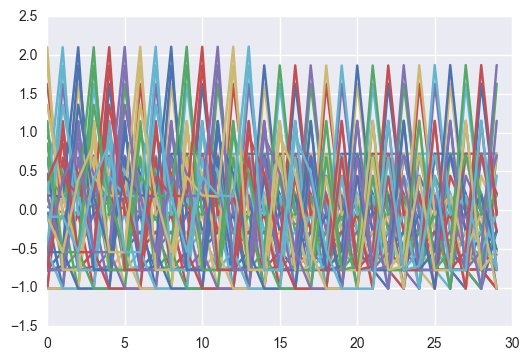

In [11]:
ds = data['XOM']

X_train = ds.X_train
Y_train = ds.Y_train

X_dev = ds.X_dev
Y_dev = ds.Y_dev

X_test = ds.X_test
Y_test = ds.Y_test

display(X_train.tail())
display(Y_train.tail())

# scale and normalise
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_dev_scaled = scaler.transform(X_dev)
X_test_scaled = scaler.transform(X_test)


# experimental y scaling.
yscaler = StandardScaler()
Y_train_scaled = yscaler.fit_transform(Y_train)
Y_dev_scaled = yscaler.transform(Y_dev).ravel()
Y_test_scaled = yscaler.transform(Y_test).ravel()

plt.plot(X_train_scaled[:30])
print "samples", len(X_train)

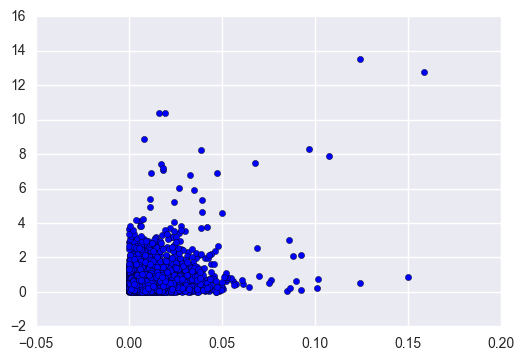

In [12]:
plt.scatter(X_train['lret-1'].abs(), np.abs(Y_train_scaled))

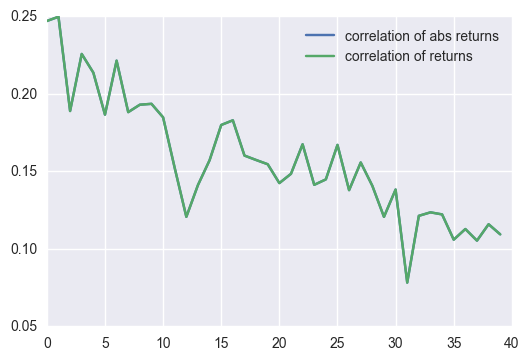

In [15]:
# report correlation between input and output features
FEATURE_LOOKBACKS=np.arange(40)+1
TARGET_LOOKAHEADS=[1]
FEATURE_COLS = ['lret-' + str(lb) for lb in FEATURE_LOOKBACKS]
TARGET_COLS = ['target-' + str(la) for la in TARGET_LOOKAHEADS]
c1 = pd.DataFrame(index=FEATURE_COLS, columns=TARGET_COLS)
c2 = pd.DataFrame(index=FEATURE_COLS, columns=TARGET_COLS)
for f in FEATURE_COLS:
    for t in TARGET_COLS:
        c1.ix[f][t] =  X_train[f].abs().corr(Y_train[t].abs())
        c2.ix[f][t] =  X_train[f].corr(Y_train[t])
        #print lb, la, X_train['lret-' + str(lb)].abs().corr(Y_train['target-' + str(la)].abs()), X_train['lret-' + str(lb)].corr(Y_train['target-' + str(la)])

#display("correlation of abs returns", c1)
#display("correlation of returns", c2)
#sns.heatmap(c1.astype(float))
#plt.show()
#sns.heatmap(c2.astype(float))

plt.plot(c1.values, label = 'correlation of abs returns')
plt.plot(c2.values, label = 'correlation of returns')
plt.legend()

In [ ]:
# y = df['lret'].shift(-1).abs()
# corr = []
# ix = []
# for i in range(1,101):
#     name = 'mavol' + str(i)
#     df[name] = df['lret'].rolling(i).std() 
#     x = df[name]
#     #print  i, x.corr(y)
#     ix.append(i)
#     corr.append(x.corr(y))

# plt.plot(ix, corr)
# plt.show()


In [16]:
%%time

from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import expon as sp_expon
from sklearn.model_selection import TimeSeriesSplit

model = RandomForestRegressor()
param_dist = {"n_estimators": sp_randint(1,200),
              "max_depth": sp_randint(1,20),
             }

# model = SVR()
# param_dist = {'C': sp_expon(scale=100), 'gamma': sp_expon(scale=.1),
#   'kernel': ['rbf', 'linear']}


# run randomized search
n_iter_search = 1 # was 50
random_search = RandomizedSearchCV(model, param_distributions=param_dist,
                                   n_iter=n_iter_search, n_jobs=-1, cv=TimeSeriesSplit(n_splits=5))

random_search.fit(X_train_scaled, Y_train_scaled.ravel())
#random_search.fit(X_train_scaled, Y_train.values)


#model = MultiOutputRegressor(SVR())
# model = DecisionTreeRegressor(max_depth=5)

print random_search.score(X_train_scaled, Y_train_scaled)
print random_search.score(X_dev_scaled, Y_dev_scaled)



KeyboardInterrupt: 

In [9]:

np.sqrt(mean_squared_error(Y_dev_scaled, random_search.predict(X_dev_scaled) )) / Y_dev_scaled.std()


1.0112566708667363

In [ ]:
todo:
    treat ewma and ma as models
    seperate models from features and evaluation
    add metrics functions to evaluate key criteria, independent of model and dataset.

In [ ]:
#random_search = joblib.load('rand_searched_rfrefressor.pkl') 

In [13]:
def rmse_rel_std(y_true, y_predict):
    return np.sqrt(mean_squared_error(y_true, y_predict))/y_true.std()

In [14]:
from sklearn.metrics import r2_score

Y_train_predict = random_search.predict(X_train_scaled)
Y_dev_predict = random_search.predict(X_dev_scaled)
print "train r2 score", r2_score(Y_train, Y_train_predict)
print "dev r2 score", r2_score(Y_dev, Y_dev_predict)

train_mse = mean_squared_error(Y_train_scaled, Y_train_predict)
print "train mse", train_mse
print "train rmse", np.sqrt(train_mse)
print "train rel rmse", rmse_rel_std(Y_train_scaled, Y_train_predict)

dev_mse = mean_squared_error(Y_dev_scaled, Y_dev_predict)
print "dev mse", dev_mse
print "dev rmse", np.sqrt(dev_mse)
print "dev rel rmse", rmse_rel_std(Y_dev_scaled, Y_dev_predict)

train r2 score -3052.28852575
dev r2 score -1452.72438446
train mse 0.267712318755
train rmse 0.517409237215
train rel rmse 0.517409237215
dev mse 0.624288138503
dev rmse 0.79011906603
dev rel rmse 1.01125667087


In [ ]:
???? why is randomsearch.score(x,y) different to mse(y_train_scaled, randomsearch.predict(x_train_Scaled)) different????



In [ ]:
joblib.dump(random_search, 'rand_searched_rfregressor.pkl')

In [ ]:
print "X_train_scaled shape", X_train_scaled.shape
print "Y_train", Y_train.values.ravel().shape

In [15]:
import keras

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import GaussianDropout
from keras.regularizers import l2, activity_l2

Using TensorFlow backend.


In [27]:
features = ['ma-1', 'ewma-12']
input_dims = len(data[data.keys()[0]].X_train[features].columns)
print "input dims", input_dims

# create model
model = Sequential()
model.add(Dense(input_dims, input_dim=input_dims, init='he_normal', activation='relu'))
#model.add(GaussianDropout(0.1))
model.add(Dense(500, init='he_normal', activation='relu' ))
#model.add(GaussianDropout(0.1))
model.add(Dense(500, init='he_normal', activation='relu' ))
#model.add(GaussianDropout(0.1))
#model.add(Dense(100, init='normal', activation='relu' ))
#model.add(GaussianDropout(0.7))
model.add(Dense(1, init='he_normal'))
# Compile model
model.compile(loss='mse', optimizer='adam')

#model.fit(X_train_scaled, Y_train)

input dims 2


In [28]:
X_train_scaled_all = None
Y_train_all = None
X_dev_scaled_all = None
Y_dev_all = None


for sym in data.keys():

#     print sym
#     train, dev, test = split_dataset(load_stock_data(sym), 75,15,15)
#     FEATURE_LOOKBACKS = np.arange(40)+1
#     TARGET_LOOKAHEADS = [1]
#     X_train, Y_train = create_features_and_targets(train, FEATURE_LOOKBACKS, TARGET_LOOKAHEADS)
#     X_dev, Y_dev = create_features_and_targets(dev, FEATURE_LOOKBACKS, TARGET_LOOKAHEADS)
    
    ds = data[sym]
    X_train = ds.X_train[features]
    Y_train = ds.Y_train
    X_dev = ds.X_dev[features]
    Y_dev = ds.Y_train

    # scale and normalise
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_dev_scaled = scaler.transform(X_dev)

    if X_train_scaled_all is None:
        X_train_scaled_all = X_train_scaled
        X_dev_scaled_all = X_dev_scaled
        Y_train_all = Y_train
        Y_dev_all = Y_dev
    else:
        X_train_scaled_all = np.concatenate( (X_train_scaled_all, X_train_scaled), axis=0)
        X_dev_scaled_all = np.concatenate( (X_dev_scaled_all, X_dev_scaled), axis=0)
        Y_train_all = np.concatenate( (Y_train_all, Y_train), axis=0)
        Y_dev_all = np.concatenate( (Y_dev_all, Y_dev), axis=0)

In [29]:
class MyCallback(keras.callbacks.Callback):
    dev_losses = []
    train_losses = []
    
    count = 0
    def on_epoch_end(self, epoch, logs):
        print epoch, logs['loss']
        self.count+=1
        if self.count %5 == 0:
            print epoch
#             train_r2 = r2_score(Y_train_all, self.model.predict(X_train_scaled_all))
#             dev_r2 = r2_score(Y_dev_all, self.model.predict(X_dev_scaled_all))
#             train_mse = mean_squared_error(Y_train_all, self.model.predict(X_train_scaled_all))
#             dev_mse = mean_squared_error(Y_dev_all, self.model.predict(X_dev_scaled_all))
            
#             print "train_r2", train_r2
#             print "dev_r2", dev_r2
#             print "train_mse", train_mse
#             print "dev_mse", dev_mse
            
            train_rel_rmse = rmse_rel_std(Y_train_all, self.model.predict(X_train_scaled_all))
            dev_rel_rmse = rmse_rel_std(Y_dev_all, self.model.predict(X_dev_scaled_all))
            print "train rel rmse", train_rel_rmse
            print "dev rel rmse", dev_rel_rmse
            
            self.train_losses.append(train_rel_rmse)
            self.dev_losses.append(dev_rel_mse)
            
                    

In [30]:
progress = MyCallback()
hist = model.fit(X_train_scaled_all, Y_train_all, nb_epoch=100, verbose=0, batch_size=150000, shuffle=True, callbacks=[progress])
plt.plot(hist.history['loss'])
print "train score", r2_score(Y_train_all, model.predict(X_train_scaled_all))
print "dev score", r2_score(Y_dev_all, model.predict(X_dev_scaled_all))

0 2.44451478841
1 1.77466028443
2 1.24386687378
3 0.229923149036
4 0.701187797373
4


ValueError: Found input variables with inconsistent numbers of samples: [377675, 72903]

In [ ]:
model.save('nn-500-500-no-dropout.h5')


In [ ]:
model = keras.models.load_model('nn-500-500-no-dropout.h5')

In [ ]:
plt.plot(progress.train_losses, progress.dev_losses)

In [ ]:
%%time 
hist = model.fit(X_train_scaled, Y_train.values.ravel(), nb_epoch=2000, verbose=0, batch_size=512000)
plt.plot(hist.history['loss'])
print "train score", r2_score(Y_train, model.predict(X_train_scaled))
print "dev score", r2_score(Y_dev, model.predict(X_dev_scaled))

In [ ]:
print "train score", r2_score(Y_train, model.predict(X_train_scaled))
print "dev score", r2_score(Y_dev, model.predict(X_dev_scaled))
#print "dev corr", Y_dev.corr(model.predict(X_dev_scaled))
#?? args to corr



In [ ]:
print Y_dev.mean()
print np.sqrt(min(hist.history['loss']))

- for all stocks split to train, dev, test.
- compute range of 5*ma_cross signals.
- compute return for each
- summarise mean performance across the set. train / dev / test

- then train single model across all train. tune on dev.
- compare that model mean performance across all stocks.

** set up hold out set of stocks that aren't used for model development.